# Prevendo as vendas das escavadeiras (Regressão)

Nesse projeto vamos fazer um exemplo de machine learning para prever o preço de venda futura para uma escavadeira.

## 1. Definição do Problema

Como podemos prever o preço de venda futura para uma escavadeira, dada suas características?

## 2. Data

Os dados são baixados do Kaggle: https://www.kaggle.com/c/bluebook-for-bulldozers/overview

## 3. Avaliação

A métrica de avaliação para esta competição é o RMSLE (erro logarítmico médio quadrático) entre os preços de leilão reais e previstos.

Para dar uma olhada na avaliação prevista: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

OBS: O objetivo da maioria das métricas de avaliação de regressão é minimizar o erro. Por exemplo, nosso objetivo neste projeto será construir um modelo de aprendizado de máquina que minimize o RMSLE.

# 4. Características

O Kaggle fornece um dicionário de dados detalhando todos os recursos do conjunto de dados.

Você pode visualizar este dicionário de dados no Google Planilhas: https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing

In [27]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [28]:
# Importar o dicionário de dados
dictionary = pd.read_excel('data/Data Dictionary.xlsx')

dictionary

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Variable  \
0                    SalesID   
1                  MachineID   
2                    ModelID   
3                 datasource   
4               auctioneerID   
5                   YearMade   
6   MachineHoursCurrentMeter   
7                  UsageBand   
8                   Saledate   
9                  Saleprice   
10               fiModelDesc   
11               fiBaseModel   
12           fiSecondaryDesc   
13             fiModelSeries   
14         fiModelDescriptor   
15               ProductSize   
16          ProductClassDesc   
17                     State   
18              ProductGroup   
19          ProductGroupDesc   
20              Drive_System   
21                 Enclosure   
22                     Forks   
23                  Pad_Type   
24              Ride_Control   
25                     Stick   
26              Transmission   
27              Turbocharged   
28           Blade_Extension   
29               Blade_Width   
30            Enclosure_Type   
31         Engine_Horsepower   
32                Hydraulics   
33                 Pushblock   
34                    Ripper   
35                 Scarifier   
36               Tip_control   
37                 Tire_Size   
38                   Coupler   
39            Coupler_System   
40            Grouser_Tracks   
41           Hydraulics_Flow   
42                Track_Type   
43   Undercarriage_Pad_Width   
44              Stick_Length   
45                     Thumb   
46           Pattern_Changer   
47              Grouser_Type   
48          Backhoe_Mounting   
49                Blade_Type   
50           Travel_Controls   
51         Differential_Type   
52         Steering_Controls   

                                          Description  \
0     unique identifier of a particular sale of a ...   
1     identifier for a particular machine;  machin...   
2     identifier for a unique machine model (i.e. ...   
3     source of the sale record;  some sources are...   
4     identifier of a particular auctioneer, i.e. ...   
5                 year of manufacturer of the Machine   
6     current usage of the machine in hours at tim...   
7     value (low, medium, high) calculated compari...   
8                                        time of sale   
9                                 cost of sale in USD   
10    Description of a unique machine model (see M...   
11                      disaggregation of fiModelDesc   
12                      disaggregation of fiModelDesc   
13                      disaggregation of fiModelDesc   
14                      disaggregation of fiModelDesc   
15                           Don't know what this is    
16    description of 2nd level hierarchical groupi...   
17                    US State in which sale occurred   
18    identifier for top-level hierarchical groupi...   
19    description of top-level hierarchical groupi...   
20  machine configuration;  typcially describes wh...   
21  machine configuration - does machine have an e...   
22  machine configuration - attachment used for li...   
23  machine configuration - type of treads a crawl...   
24  machine configuration - optional feature on lo...   
25           machine configuration - type of control    
26  machine configuration - describes type of tran...   
27  machine configuration - engine naturally aspir...   
28  machine configuration - extension of standard ...   
29             machine configuration - width of blade   
30  machine configuration - does machine have an e...   
31   machine configuration - engine horsepower rating   
32         machine configuration - type of hydraulics   
33                     machine configuration - option   
34  machine configuration - implement attached to ...   
35  machine configuration - implement attached to ...   
36      machine configuration - type of blade control   
37      machine configuration - size of primary tires   
38  machine configuration - type of implement inte...   
39  machine

In [29]:
# Importar os dados de treinamento e validação
df = pd.read_csv('data/TrainAndValid.csv')

df[:1000]

C:\Users\Admin\AppData\Local\Temp\ipykernel_7400\26637477.py:2: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/TrainAndValid.csv')


SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
0    1139246      66000     999089     3157         121           3.0   
1    1139248      57000     117657       77         121           3.0   
2    1139249      10000     434808     7009         121           3.0   
3    1139251      38500    1026470      332         121           3.0   
4    1139253      11000    1057373    17311         121           3.0   
..       ...        ...        ...      ...         ...           ...   
995  1142566      33000    1069733     5428         121           3.0   
996  1142567      62000     531918    23162         121           3.0   
997  1142568       8000    1064508    17472         121           3.0   
998  1142577      16000    1046210    13391         121           3.0   
999  1142582      14500    1031625     9578         121           3.0   

     YearMade  MachineHoursCurrentMeter UsageBand         saledate  ...  \
0        2004                      68.0       Low  11/16/2006 0:00  ...   
1        1996                    4640.0       Low   3/26/2004 0:00  ...   
2        2001                    2838.0      High   2/26/2004 0:00  ...   
3        2001                    3486.0      High   5/19/2011 0:00  ...   
4        2007                     722.0    Medium   7/23/2009 0:00  ...   
..        ...                       ...       ...              ...  ...   
995      2005                    3759.0    Medium   7/16/2009 0:00  ...   
996      2005                    1290.0    Medium   6/14/2007 0:00  ...   
997      1998                    1865.0    Medium   9/22/2005 0:00  ...   
998      2004                     851.0      High   7/28/2005 0:00  ...   
999      2006                    2750.0      High   6/16/2011 0:00  ...   

    Undercarriage_Pad_Width         Stick_Length                Thumb  \
0                       NaN                  NaN                  NaN   
1                       NaN                  NaN                  NaN   
2                       NaN                  NaN                  NaN   
3                       NaN                  NaN                  NaN   
4                       NaN                  NaN                  NaN   
..                      ...                  ...                  ...   
995     None or Unspecified  None or Unspecified            Hydraulic   
996     None or Unspecified  None or Unspecified  None or Unspecified   
997                     NaN                  NaN                  NaN   
998     None or Unspecified  None or Unspecified  None or Unspecified   
999                     NaN                  NaN                  NaN   

         Pattern_Changer Grouser_Type Backhoe_Mounting Blade_Type  \
0                    NaN          NaN              NaN        NaN   
1                    NaN          NaN              NaN        NaN   
2                    NaN          NaN              NaN        NaN   
3                    NaN          NaN              NaN        NaN   
4                    NaN          NaN              NaN        NaN   
..                   ...          ...              ...        ...   
995  None or Unspecified       Double              NaN        NaN   
996  None or Unspecified       Double              NaN        NaN   
997                  NaN          NaN              NaN        NaN   
998  None or Unspecified       Double              NaN        NaN   
999                  NaN          NaN              NaN        NaN   

    Travel_Controls Differential_Type Steering_Controls  
0               NaN          Standard      Conventional  
1               NaN          Standard      Conventional  
2               NaN               NaN               NaN  
3               NaN               NaN               NaN  
4               NaN               NaN               NaN  
..              ...               ...               ...  
995             NaN               NaN               NaN  
996             NaN               NaN               NaN  

In [30]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349999 entries, 0 to 349998
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   349999 non-null  int64  
 1   SalePrice                 349999 non-null  int64  
 2   MachineID                 349999 non-null  int64  
 3   ModelID                   349999 non-null  int64  
 4   datasource                349999 non-null  int64  
 5   auctioneerID              332381 non-null  float64
 6   YearMade                  349999 non-null  int64  
 7   MachineHoursCurrentMeter  100424 non-null  float64
 8   UsageBand                 44636 non-null   object 
 9   saledate                  349999 non-null  object 
 10  fiModelDesc               349999 non-null  object 
 11  fiBaseModel               349999 non-null  object 
 12  fiSecondaryDesc           231654 non-null  object 
 13  fiModelSeries             47048 non-null   o

In [32]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 17618
YearMade                         0
MachineHoursCurrentMeter    249575
UsageBand                   305363
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             118345
fiModelSeries               302951
fiModelDescriptor           290460
ProductSize                 184102
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                256252
Enclosure                      306
Forks                       184477
Pad_Type                    278859
Ride_Control                218874
Stick                       278859
Transmission                185754
Turbocharged                278859
Blade_Extension     

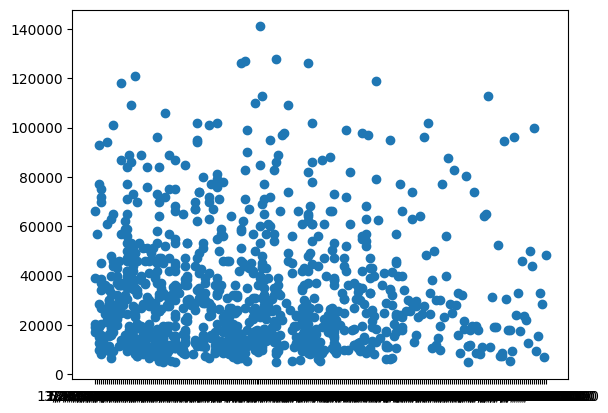

In [33]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [34]:
# OBS: são esses valores que estão sendo plotados
df.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

<Axes: ylabel='Frequency'>

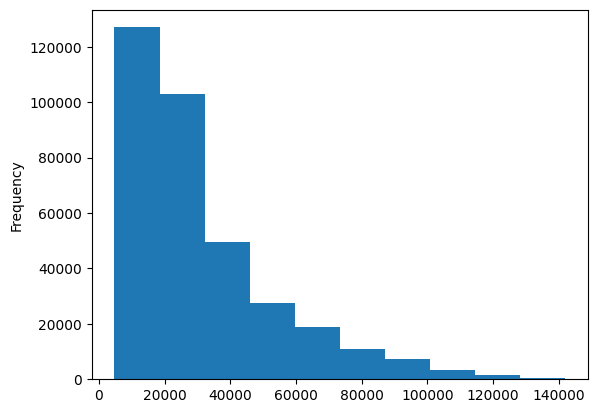

In [35]:
# Fazer um diagrama de distribuição para ver como é a variância da nossa variável alvo
df.SalePrice.plot.hist()

### Quando estamos trabalhando com dados datados, queremos transformar os dados de data que estão em um formato de objeto em um formato de 'date'

Para isso é possível transformar por meio do pandas, utilizando o 'parse_dates'

In [36]:
# Ler o arquivo novamente
df = pd.read_csv('data/TrainAndValid.csv',
                parse_dates=['saledate'])

df.head(5)

C:\Users\Admin\AppData\Local\Temp\ipykernel_7400\3685046470.py:2: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/TrainAndValid.csv',


SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1139246      66000     999089     3157         121           3.0      2004   
1  1139248      57000     117657       77         121           3.0      1996   
2  1139249      10000     434808     7009         121           3.0      2001   
3  1139251      38500    1026470      332         121           3.0      2001   
4  1139253      11000    1057373    17311         121           3.0      2007   

   MachineHoursCurrentMeter UsageBand   saledate  ... Undercarriage_Pad_Width  \
0                      68.0       Low 2006-11-16  ...                     NaN   
1                    4640.0       Low 2004-03-26  ...                     NaN   
2                    2838.0      High 2004-02-26  ...                     NaN   
3                    3486.0      High 2011-05-19  ...                     NaN   
4                     722.0    Medium 2009-07-23  ...                     NaN   

  Stick_Length Thumb Pattern_Changer Grouser_Type Backhoe_Mounting Blade_Type  \
0          NaN   NaN             NaN          NaN              NaN        NaN   
1          NaN   NaN             NaN          NaN              NaN        NaN   
2          NaN   NaN             NaN          NaN              NaN        NaN   
3          NaN   NaN             NaN          NaN              NaN        NaN   
4          NaN   NaN             NaN          NaN              NaN        NaN   

  Travel_Controls Differential_Type Steering_Controls  
0             NaN          Standard      Conventional  
1             NaN          Standard      Conventional  
2             NaN               NaN               NaN  
3             NaN               NaN               NaN  
4             NaN               NaN               NaN  

[5 rows x 53 columns]

In [ ]:
df['saledate'].info() # agora está em objeto datetime

<class 'pandas.core.series.Series'>
RangeIndex: 349999 entries, 0 to 349998
Series name: saledate
Non-Null Count   Dtype         
--------------   -----         
349999 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.7 MB


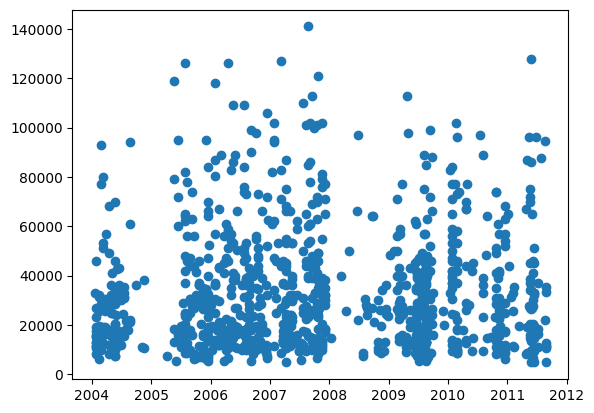

In [39]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])

In [40]:
# Para ver todas as colunas (não cortar)

df.head().T

0  \
SalesID                                                    1139246   
SalePrice                                                    66000   
MachineID                                                   999089   
ModelID                                                       3157   
datasource                                                     121   
auctioneerID                                                   3.0   
YearMade                                                      2004   
MachineHoursCurrentMeter                                      68.0   
UsageBand                                                      Low   
saledate                                       2006-11-16 00:00:00   
fiModelDesc                                                   521D   
fiBaseModel                                                    521   
fiSecondaryDesc                                                  D   
fiModelSeries                                                  NaN   
fiModelDescriptor                                              NaN   
ProductSize                                                    NaN   
fiProductClassDesc        Wheel Loader - 110.0 to 120.0 Horsepower   
state                                                      Alabama   
ProductGroup                                                    WL   
ProductGroupDesc                                      Wheel Loader   
Drive_System                                                   NaN   
Enclosure                                               EROPS w AC   
Forks                                          None or Unspecified   
Pad_Type                                                       NaN   
Ride_Control                                   None or Unspecified   
Stick                                                          NaN   
Transmission                                                   NaN   
Turbocharged                                                   NaN   
Blade_Extension                                                NaN   
Blade_Width                                                    NaN   
Enclosure_Type                                                 NaN   
Engine_Horsepower                                              NaN   
Hydraulics                                                 2 Valve   
Pushblock                                                      NaN   
Ripper                                                         NaN   
Scarifier                                                      NaN   
Tip_Control                                                    NaN   
Tire_Size                                      None or Unspecified   
Coupler                                        None or Unspecified   
Coupler_System                                                 NaN   
Grouser_Tracks                                                 NaN   
Hydraulics_Flow                                                NaN   
Track_Type                                                     NaN   
Undercarriage_Pad_Width                                        NaN   
Stick_Length                                                   NaN   
Thumb                                                          NaN   
Pattern_Changer                                                NaN   
Grouser_Type                                                   NaN   
Backhoe_Mounting                                               NaN   
Blade_Type                                                     NaN   
Travel_Controls                                                NaN   
Differential_Type                                         Standard   
Steering_Controls                                     Conventional   

                                                                 1  \
SalesID                                                    1139248   
SalePrice                                                    57000   
MachineID                                                   117657   
Mode

In [41]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Ordenando o dataframe pelos dados da data de venda

Ao trabalhar com dados de séries temporais, é uma boa ideia ordena-los por data.

In [42]:
df = df.sort_values(by=['saledate'], ascending=True)

df.head(5)

SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
205615  1646770       9500    1126363     8434         132          18.0   
204924  1645390      11750    1527216     8202         132          99.0   
67974   1344379      70000    1374638     3819         132          99.0   
92294   1403411      23000    1184544     7110         132          99.0   
54438   1301582      24000    1199381     4123         132          18.0   

        YearMade  MachineHoursCurrentMeter UsageBand   saledate  ...  \
205615      1974                       NaN       NaN 1989-01-17  ...   
204924      1970                       NaN       NaN 1989-01-31  ...   
67974       1982                       NaN       NaN 1989-01-31  ...   
92294       1986                       NaN       NaN 1989-01-31  ...   
54438       1974                       NaN       NaN 1989-01-31  ...   

       Undercarriage_Pad_Width Stick_Length Thumb Pattern_Changer  \
205615                     NaN          NaN   NaN             NaN   
204924                     NaN          NaN   NaN             NaN   
67974                      NaN          NaN   NaN             NaN   
92294                      NaN          NaN   NaN             NaN   
54438                      NaN          NaN   NaN             NaN   

       Grouser_Type     Backhoe_Mounting           Blade_Type  \
205615          NaN  None or Unspecified             Straight   
204924          NaN                  NaN                  NaN   
67974           NaN                  NaN                  NaN   
92294           NaN                  NaN                  NaN   
54438           NaN  None or Unspecified  None or Unspecified   

            Travel_Controls Differential_Type Steering_Controls  
205615  None or Unspecified               NaN               NaN  
204924                  NaN          Standard      Conventional  
67974                   NaN          Standard      Conventional  
92294                   NaN               NaN               NaN  
54438   None or Unspecified               NaN               NaN  

[5 rows x 53 columns]

In [43]:
df.saledate.head(5)

205615   1989-01-17
204924   1989-01-31
67974    1989-01-31
92294    1989-01-31
54438    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Fazer um cópia do dataframe original

Quando estamos trabalhando na análise exploratória dos dados, é uma boa opção criar um dataframe temporário para estudar o dataset.

In [46]:
df_temp = df.copy()

df_temp.saledate.head(5)

205615   1989-01-17
204924   1989-01-31
67974    1989-01-31
92294    1989-01-31
54438    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Adicionar colunas dentro do dataframe 'repartindo' a coluna 'saledate'

In [48]:
df_temp["saleYear"] = df_temp.saledate.dt.year
df_temp["saleMonth"] = df_temp.saledate.dt.month
df_temp["saleDay"] = df_temp.saledate.dt.day
df_temp["saleDayOfWeek"] = df_temp.saledate.dt.dayofweek
df_temp["saleDayOfYear"] = df_temp.saledate.dt.dayofyear

In [49]:
df_temp.drop('saledate', axis=1, inplace=True)

In [50]:
df_temp.state.value_counts()

state
Florida           57483
Texas             43110
California        24557
Washington        13253
Georgia           12057
Mississippi       11830
Ohio              10994
Maryland          10564
New Jersey        10189
Illinois           9457
Pennsylvania       9448
Colorado           9443
Alabama            9118
South Carolina     8756
North Carolina     8739
Tennessee          8385
New York           8019
Arizona            7750
Connecticut        7056
Minnesota          6954
Louisiana          5951
Nevada             5644
Missouri           5512
Maine              5083
Kentucky           4727
Indiana            3866
Arkansas           3583
New Mexico         2861
Unspecified        2801
New Hampshire      2620
Wisconsin          2406
Utah               2188
Virginia           2003
Idaho              1734
Wyoming            1626
Oregon             1603
Michigan           1267
Oklahoma           1220
Montana            1098
Iowa                987
West Virginia       650
Kansas    